# Analysis of Powerball winning numbers
## Kalyan Pothineni

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data file
file_path = 'Lottery_Powerball_Winning_Numbers__Beginning_2010.csv'
data = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset and its structure
data_head = data.head()
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1650 non-null   object 
 1   Winning Numbers  1650 non-null   object 
 2   Multiplier       1440 non-null   float64
dtypes: float64(1), object(2)
memory usage: 38.8+ KB


In [3]:
# Convert Draw Date to datetime
data['Draw Date'] = pd.to_datetime(data['Draw Date'], format='%m/%d/%Y')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Draw Date        1650 non-null   datetime64[ns]
 1   Winning Numbers  1650 non-null   object        
 2   Multiplier       1440 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 38.8+ KB


In [5]:
# Split the Winning Numbers into separate columns
winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = ['White Ball 1', 'White Ball 2', 'White Ball 3', 'White Ball 4', 'White Ball 5', 'Red Powerball']

In [6]:
# Concatenate the split columns with the original dataframe
data = pd.concat([data, winning_numbers], axis=1)

In [7]:
# Drop the original Winning Numbers column
data.drop(columns=['Winning Numbers'], inplace=True)

In [8]:
# Handle missing values in the Multiplier column by filling with 1 (assuming no multiplier)
data['Multiplier'].fillna(1, inplace=True)

In [9]:
# Convert the ball columns to integers
ball_columns = ['White Ball 1', 'White Ball 2', 'White Ball 3', 'White Ball 4', 'White Ball 5', 'Red Powerball']
data[ball_columns] = data[ball_columns].astype(int)

In [10]:
# Display the cleaned data
data.head()

,Draw Date,Multiplier,White Ball 1,White Ball 2,White Ball 3,White Ball 4,White Ball 5,Red Powerball
0,2020-09-26,3.0,11,21,27,36,62,24
1,2020-09-30,2.0,14,18,36,49,67,18
2,2020-10-03,2.0,18,31,36,43,47,20
3,2020-10-07,2.0,6,24,30,53,56,19
4,2020-10-10,3.0,5,18,23,40,50,18


In [11]:
# Visualize the frequency of each White Ball number
white_balls = data[ball_columns[:-1]].values.flatten()
white_ball_freq = pd.Series(white_balls).value_counts().sort_index()

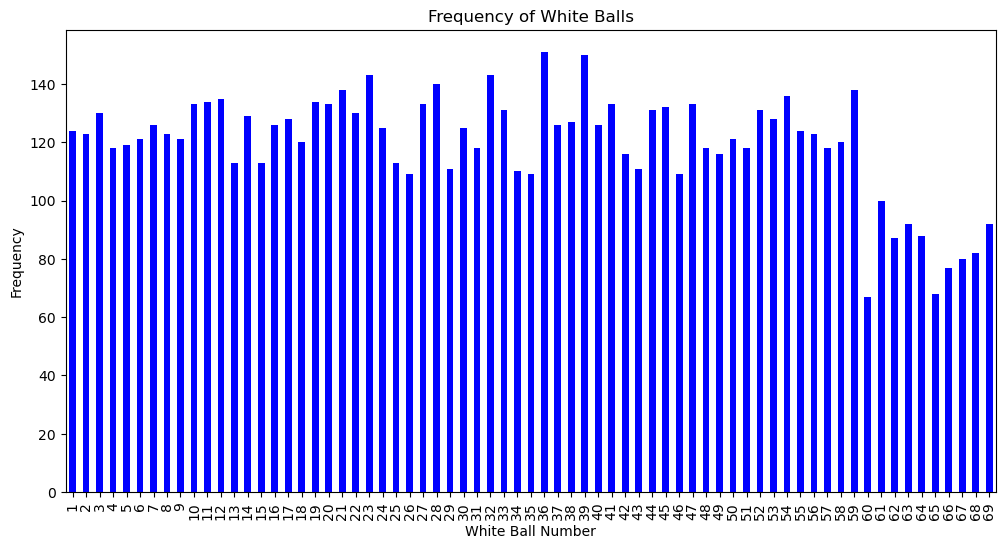

In [12]:
plt.figure(figsize=(12, 6))
white_ball_freq.plot(kind='bar', color='blue')
plt.title('Frequency of White Balls')
plt.xlabel('White Ball Number')
plt.ylabel('Frequency')
plt.show()

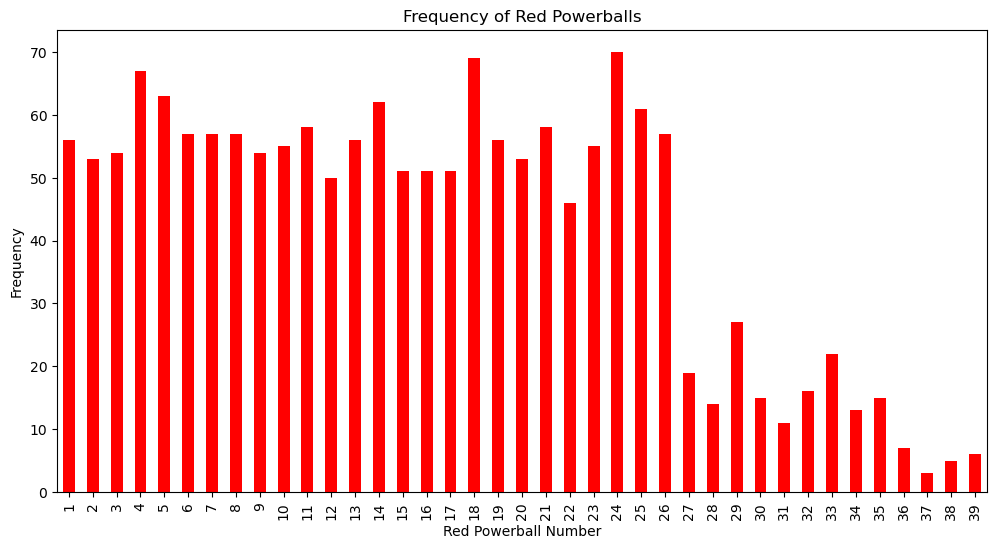

In [13]:
# Visualize the frequency of Red Powerball numbers
red_ball_freq = data['Red Powerball'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
red_ball_freq.plot(kind='bar', color='red')
plt.title('Frequency of Red Powerballs')
plt.xlabel('Red Powerball Number')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Display the most common numbers
print("Most common White Ball numbers:")
print(white_ball_freq.sort_values(ascending=False).head(10))

print("\nMost common Red Powerball numbers:")
print(red_ball_freq.sort_values(ascending=False).head(5))

Most common White Ball numbers:
36    151
39    150
23    143
32    143
28    140
59    138
21    138
54    136
12    135
19    134
Name: count, dtype: int64

Most common Red Powerball numbers:
Red Powerball
24    70
18    69
4     67
5     63
14    62
Name: count, dtype: int64


In [15]:
from itertools import combinations
from collections import Counter

# Helper function to count frequency of combinations
def count_combinations(data, n):
    combos = []
    for row in data[ball_columns[:-1]].itertuples(index=False):
        combos.extend(combinations(row, n))
    return Counter(combos)

# Frequency of each individual number
individual_freq = data[ball_columns[:-1]].stack().value_counts().sort_index()

# Frequency of each pair
pair_freq = count_combinations(data, 2)

# Frequency of each triple
triple_freq = count_combinations(data, 3)

# Frequency of each quadruple
quadruple_freq = count_combinations(data, 4)

# Frequency of each quintuple
quintuple_freq = count_combinations(data, 5)

# Display results
print("Most common individual numbers:")
print(individual_freq.sort_values(ascending=False).head(10))

print("\nMost common pairs:")
print(pair_freq.most_common(10))

print("\nMost common triples:")
print(triple_freq.most_common(10))

print("\nMost common quadruples:")
print(quadruple_freq.most_common(10))

print("\nMost common quintuples:")
print(quintuple_freq.most_common(10))


Most common individual numbers:
36    151
39    150
23    143
32    143
28    140
59    138
21    138
54    136
12    135
19    134
Name: count, dtype: int64

Most common pairs:
[((37, 44), 19), ((41, 59), 19), ((37, 39), 18), ((22, 32), 17), ((30, 59), 17), ((30, 48), 17), ((36, 52), 17), ((21, 32), 16), ((12, 20), 16), ((30, 53), 15)]

Most common triples:
[((1, 3, 13), 5), ((23, 28, 56), 5), ((18, 32, 45), 4), ((8, 44, 51), 4), ((1, 2, 7), 4), ((8, 17, 59), 4), ((12, 20, 21), 4), ((28, 53, 56), 4), ((7, 15, 36), 4), ((28, 40, 48), 4)]

Most common quadruples:
[((37, 52, 53, 58), 2), ((1, 3, 13, 44), 2), ((10, 24, 35, 53), 2), ((8, 31, 39, 43), 2), ((5, 18, 33, 43), 2), ((37, 44, 45, 53), 2), ((35, 41, 44, 58), 2), ((1, 2, 39, 66), 2), ((6, 8, 37, 40), 2), ((5, 23, 28, 56), 2)]

Most common quintuples:
[((11, 21, 27, 36, 62), 1), ((14, 18, 36, 49, 67), 1), ((18, 31, 36, 43, 47), 1), ((6, 24, 30, 53, 56), 1), ((5, 18, 23, 40, 50), 1), ((21, 37, 52, 53, 58), 1), ((6, 10, 31, 37, 44), 1

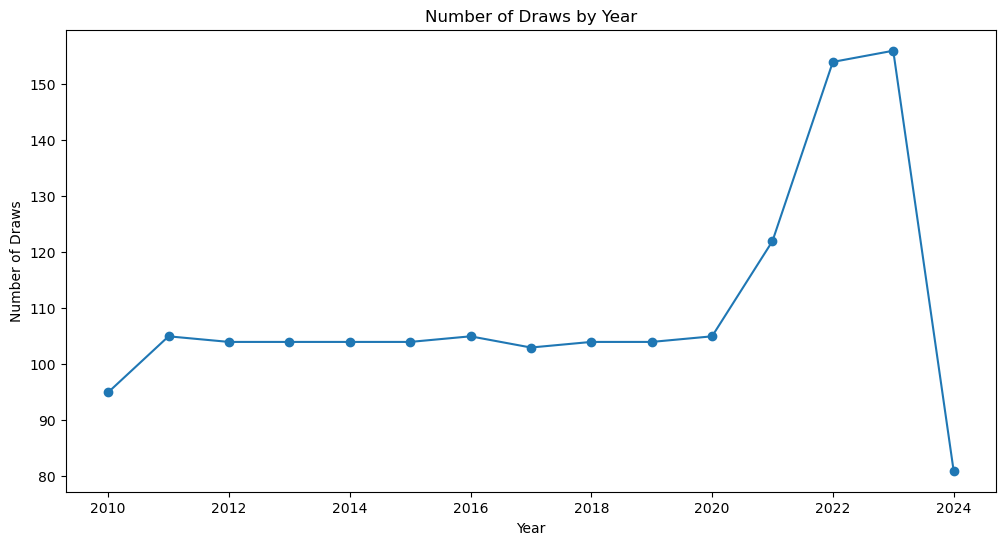

In [16]:
# Visualize the trend of draws by year
data['Year'] = data['Draw Date'].dt.year
yearly_trends = data.groupby('Year').size()

plt.figure(figsize=(12, 6))
yearly_trends.plot(kind='line', marker='o')
plt.title('Number of Draws by Year')
plt.xlabel('Year')
plt.ylabel('Number of Draws')
plt.show()


## Methods

### Heatmap of Co-occurrence of White Ball Numbers

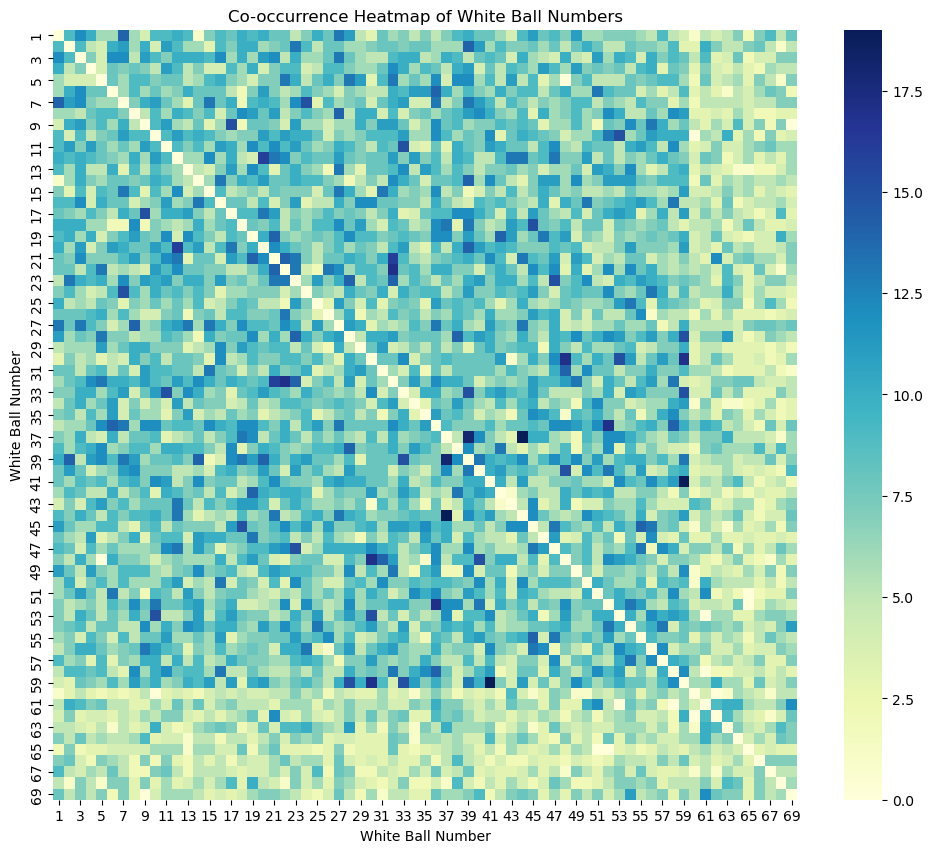

In [17]:
import seaborn as sns

# Create a co-occurrence matrix for white ball numbers
co_occurrence = pd.DataFrame(0, index=range(1, 70), columns=range(1, 70))

for row in data[ball_columns[:-1]].itertuples(index=False):
    for i in range(5):
        for j in range(i + 1, 5):
            co_occurrence.loc[row[i], row[j]] += 1
            co_occurrence.loc[row[j], row[i]] += 1

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, cmap="YlGnBu")
plt.title('Co-occurrence Heatmap of White Ball Numbers')
plt.xlabel('White Ball Number')
plt.ylabel('White Ball Number')
plt.show()


### Box Plot of Drawn Numbers

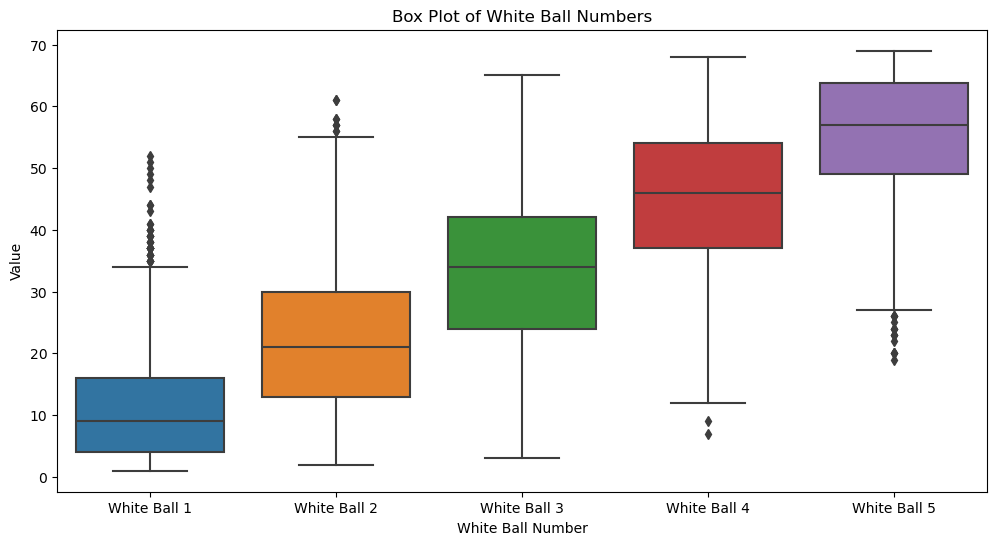

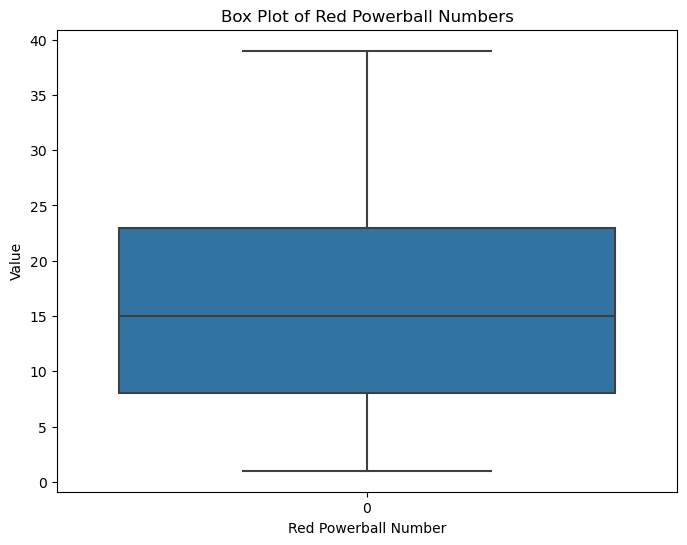

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[ball_columns[:-1]])
plt.title('Box Plot of White Ball Numbers')
plt.xlabel('White Ball Number')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Red Powerball'])
plt.title('Box Plot of Red Powerball Numbers')
plt.xlabel('Red Powerball Number')
plt.ylabel('Value')
plt.show()


### Scatter Plot of Draw Dates vs. Winning Numbers

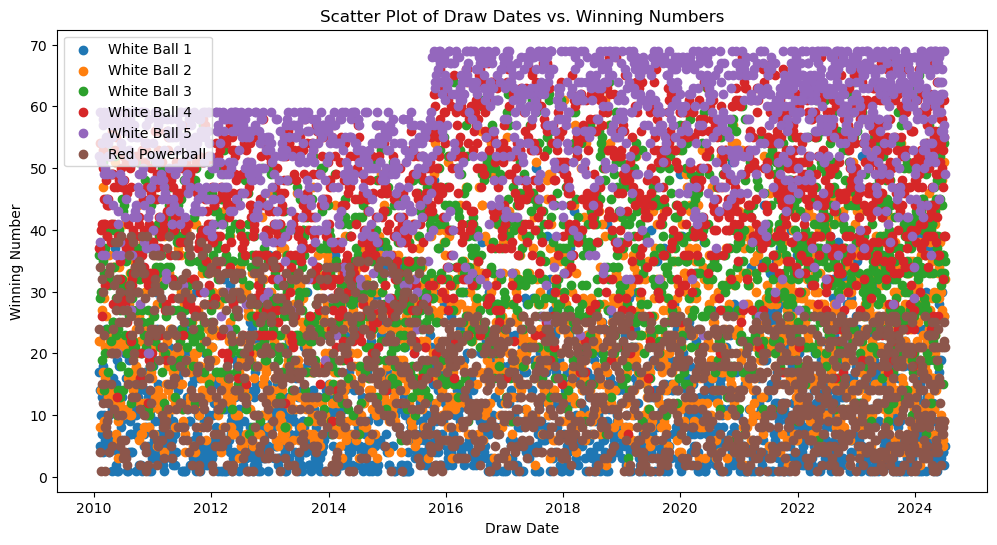

In [19]:
plt.figure(figsize=(12, 6))
for ball in ball_columns:
    plt.scatter(data['Draw Date'], data[ball], label=ball)
plt.title('Scatter Plot of Draw Dates vs. Winning Numbers')
plt.xlabel('Draw Date')
plt.ylabel('Winning Number')
plt.legend()
plt.show()


### Clustering of Draws

KMeans(n_clusters=5, random_state=0)


<Figure size 1200x600 with 0 Axes>

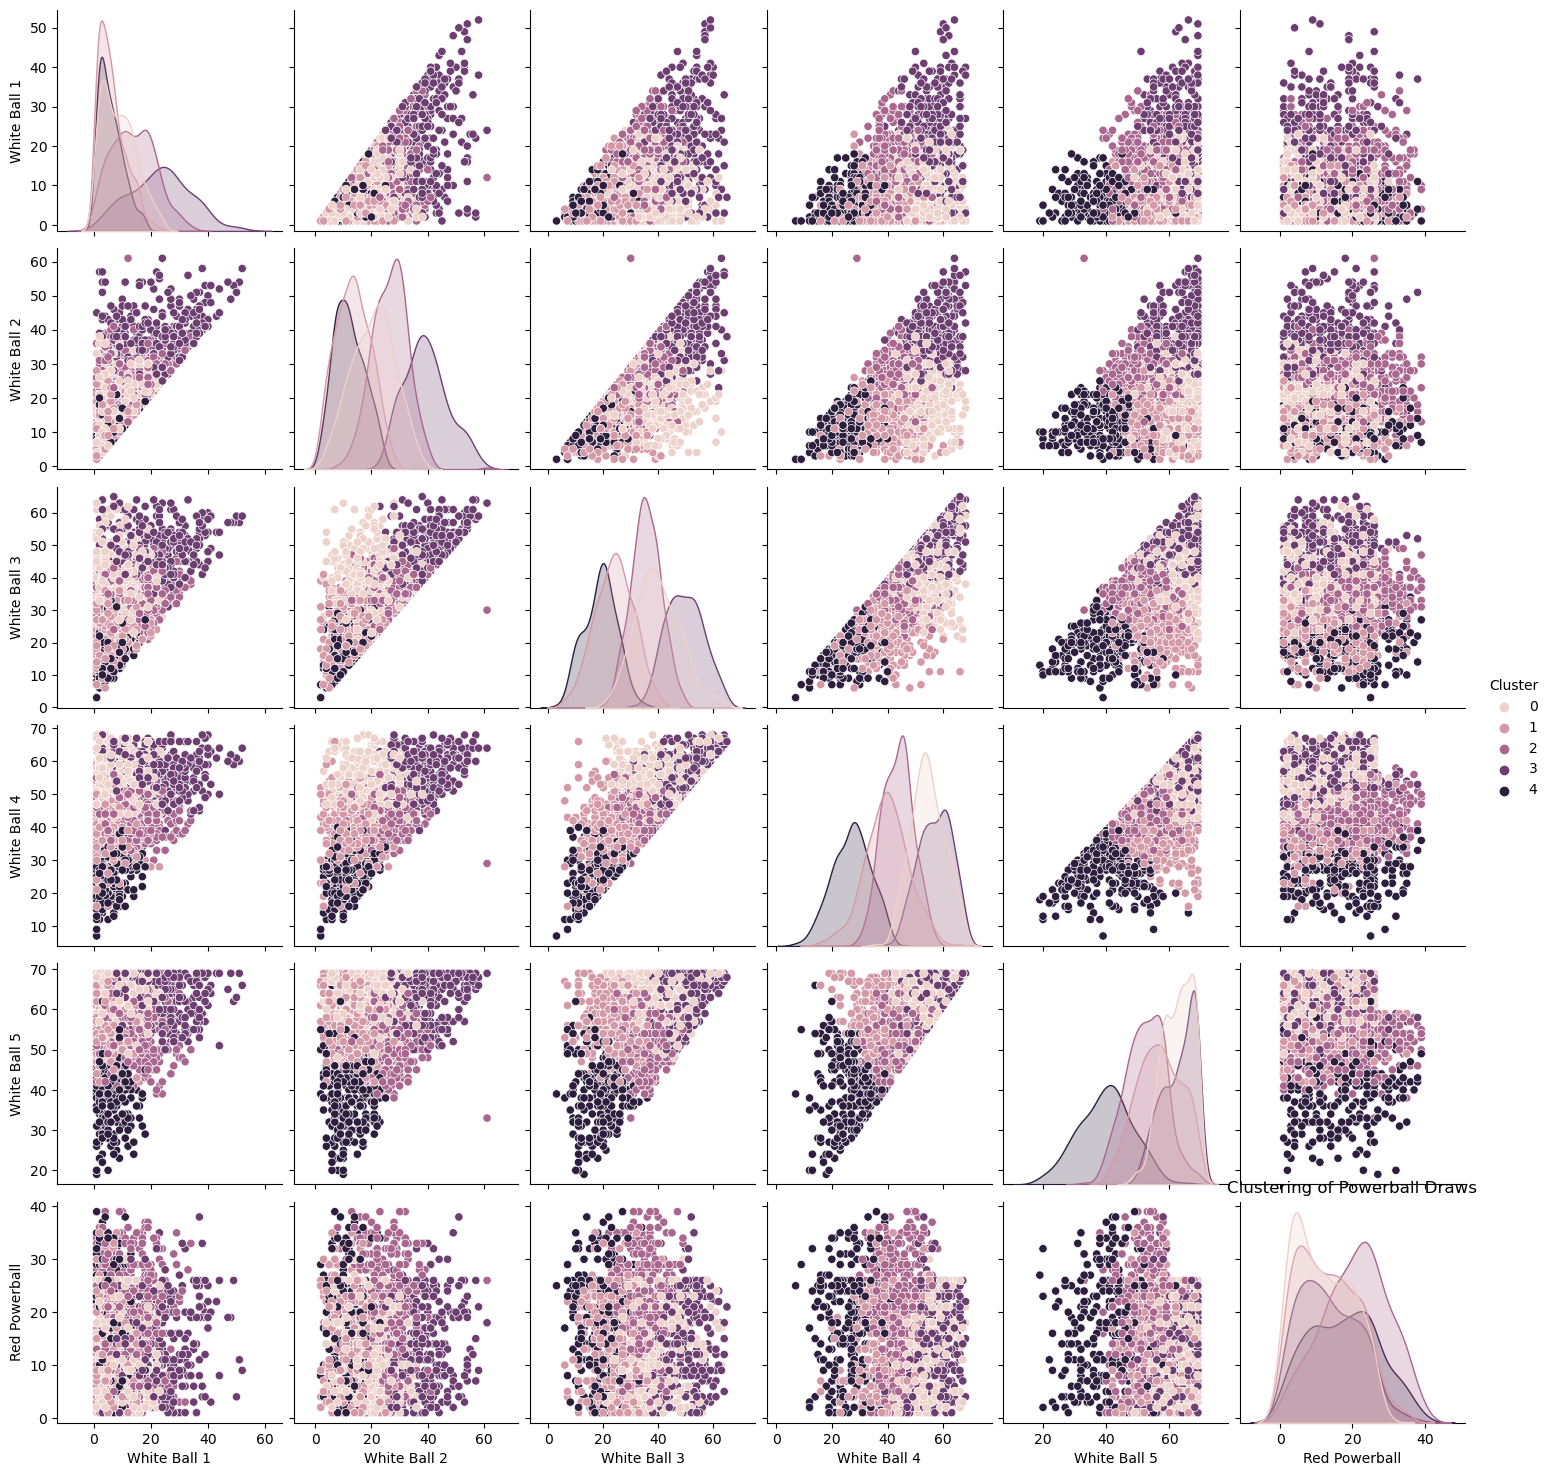

In [20]:
from sklearn.cluster import KMeans
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Prepare data for clustering
X = data[ball_columns]

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X)

print(kmeans)

# Add cluster labels to data
data['Cluster'] = clusters

# Visualization: Cluster Plot
plt.figure(figsize=(12, 6))
sns.pairplot(data, hue='Cluster', vars=ball_columns)
plt.title('Clustering of Powerball Draws')
plt.show()


### Time Series Analysis

<Figure size 1200x800 with 0 Axes>

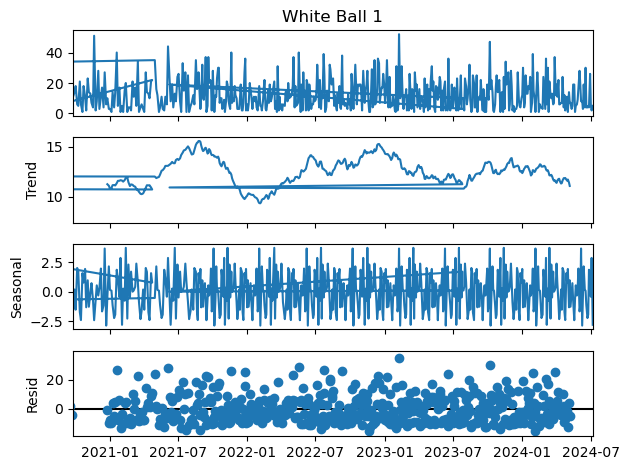

In [21]:
import statsmodels.api as sm

# Decompose the time series for one of the white balls
white_ball_1_ts = data.set_index('Draw Date')['White Ball 1']
decomposition = sm.tsa.seasonal_decompose(white_ball_1_ts, model='additive', period=52)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


## Conclusion

Conducting Powerball-winning numbers does bring out general patterns and frequencies. Some frequently appearing numbers are 36, 39, and 23 in this category of numbers. Contains frequently observed pairs of points like (37, 44) and (41, 59). Also, common tuples of three, four, and five numbers were defined, adding more depth to the observations that the lottery numbers are random. K-means cluster analysis showed that similar drawings are grouped, which gave more depth to the drawing process analysis. The achieved results may provide significant information to all those who want to know more about the lottery statistics. 

## Assumptions 

- The dataset from data.gov is accurate and comprehensive. 

- The Powerball drawing process is random and unbiased. 

- Historical patterns may provide insights, though future draws remain random. 